In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from model.model import SiameseNN
from model.processing.data_management import load_data, prepare_data, prepare_dataloader
from model.config import config
from model.train_model import run_training

Using TensorFlow backend.


In [2]:
data = load_data()
train_images, train_labels, test_images, test_labels = prepare_data(data)

C:\Users\skyst\Documents\ProfessionalDevelopment\DataSciencePortfolio\facialRecognition\packages\model\model\data\subject*


In [3]:
train_positives, train_negatives, test_positives, test_negatives = prepare_dataloader(train_images, train_labels, test_images, test_labels)

In [4]:
train_losses, test_losses = run_training()

C:\Users\skyst\Documents\ProfessionalDevelopment\DataSciencePortfolio\facialRecognition\packages\model\model\data\subject*
cuda:0
Epoch 1/128, Train Loss: 5.3919,         Test Loss: 3.1319, Duration: 0:00:07.336249
Epoch 2/128, Train Loss: 0.1416,         Test Loss: 0.1406, Duration: 0:00:06.019219
Epoch 3/128, Train Loss: 0.1352,         Test Loss: 0.2530, Duration: 0:00:06.064813
Epoch 4/128, Train Loss: 0.1074,         Test Loss: 0.1556, Duration: 0:00:06.121400
Epoch 5/128, Train Loss: 0.0891,         Test Loss: 0.1216, Duration: 0:00:06.159396
Epoch 6/128, Train Loss: 0.0668,         Test Loss: 0.1386, Duration: 0:00:06.160403
Epoch 7/128, Train Loss: 0.0561,         Test Loss: 0.1164, Duration: 0:00:06.148472
Epoch 8/128, Train Loss: 0.0498,         Test Loss: 0.1589, Duration: 0:00:06.227260
Epoch 9/128, Train Loss: 0.0511,         Test Loss: 0.1501, Duration: 0:00:06.169599
Epoch 10/128, Train Loss: 0.0524,         Test Loss: 0.1387, Duration: 0:00:06.207871
Epoch 11/128, Train

Epoch 95/128, Train Loss: 0.0183,         Test Loss: 0.4369, Duration: 0:00:06.378536
Epoch 96/128, Train Loss: 0.0146,         Test Loss: 0.4417, Duration: 0:00:06.370681
Epoch 97/128, Train Loss: 0.0108,         Test Loss: 0.5665, Duration: 0:00:06.383920
Epoch 98/128, Train Loss: 0.0124,         Test Loss: 0.7202, Duration: 0:00:06.384845
Epoch 99/128, Train Loss: 0.0201,         Test Loss: 0.3752, Duration: 0:00:06.369592
Epoch 100/128, Train Loss: 0.0245,         Test Loss: 0.3682, Duration: 0:00:06.389496
Epoch 101/128, Train Loss: 0.0154,         Test Loss: 0.5843, Duration: 0:00:06.380362
Epoch 102/128, Train Loss: 0.0141,         Test Loss: 0.5302, Duration: 0:00:06.379468
Epoch 103/128, Train Loss: 0.0171,         Test Loss: 0.4435, Duration: 0:00:06.379271
Epoch 104/128, Train Loss: 0.0123,         Test Loss: 0.6602, Duration: 0:00:06.378643
Epoch 105/128, Train Loss: 0.0109,         Test Loss: 0.6373, Duration: 0:00:06.400245
Epoch 106/128, Train Loss: 0.0128,         Test 

In [5]:
model = SiameseNN(config.FEATURE_DIM)
model.load_state_dict( state_dict = torch.load(config.TRAINED_MODEL_DIR / config.MODEL_NAME) )

<All keys matched successfully>

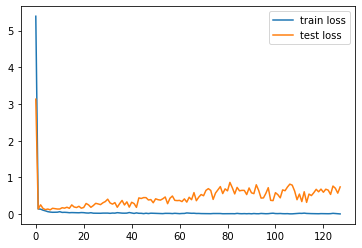

In [6]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [7]:
from model.score import get_train_accuracy, get_test_accuracy

428
13664
sensitivity (tpr): 0.9158878504672897, specificity (tnr): 0.9639929742388759


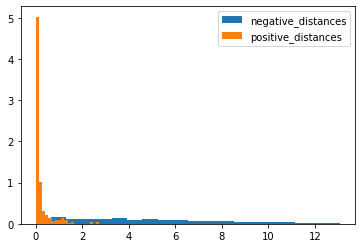

In [8]:
get_train_accuracy(model, train_images, train_positives, train_negatives, threshold=0.70)

45
1890
sensitivity (tpr): 0.6666666666666666, specificity (tnr): 0.926984126984127


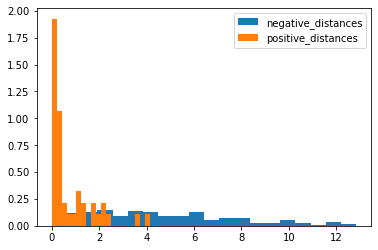

In [9]:
get_test_accuracy(model, test_images, test_positives, test_negatives, threshold=0.70)